In [8]:
import pandas as pd
file_path = 'C:/Users/PC/OneDrive/Máy tính/PYTHON/restaurant_data.csv'
restaurant_data = pd.read_csv(file_path)
mean_revenue_by_price = restaurant_data.groupby('Average Meal Price')['Revenue'].mean().reset_index()
mean_revenue_by_price.columns = ['Average Meal Price', 'Mean Revenue']
pd.options.display.float_format = '{:.2f}'.format
print(mean_revenue_by_price)

      Average Meal Price  Mean Revenue
0                  25.00     430022.97
1                  25.04     508601.26
2                  25.05     395059.40
3                  25.06     412785.54
4                  25.08     309704.98
...                  ...           ...
3961               75.95     597974.55
3962               75.97    1365783.83
3963               75.98    1475620.48
3964               75.99    1394908.28
3965               76.00    1139597.80

[3966 rows x 2 columns]


Create a scatter plot to observe the relationship between X (Average Meal Price) and (Revenue).

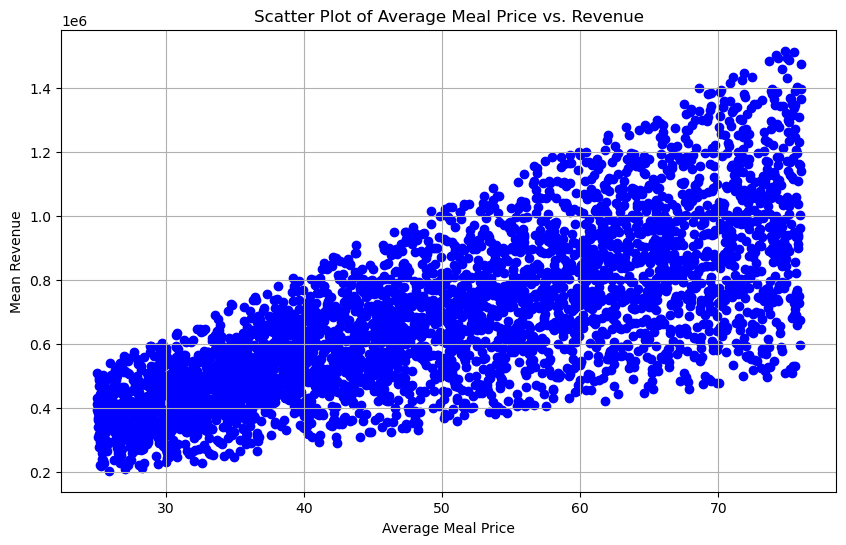

In [9]:
import matplotlib.pyplot as plt
X = mean_revenue_by_price['Average Meal Price']
Y = mean_revenue_by_price['Mean Revenue']

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue')
plt.title('Scatter Plot of Average Meal Price vs. Revenue')
plt.xlabel('Average Meal Price')
plt.ylabel('Mean Revenue')
plt.grid(True)
plt.show()

Compute the sample correlation coefficient.

In [10]:
correlation_coefficient = X.corr(Y)
print(correlation_coefficient)

0.7486027303179931


Find the equation of the estimated regression line, and use it to
predict a future value for Y.

Slope: 12787.800417530867
Intercept: 43715.79723858449
Equation of the estimated regression line: 12787.800417530867*X + 43715.79723858449


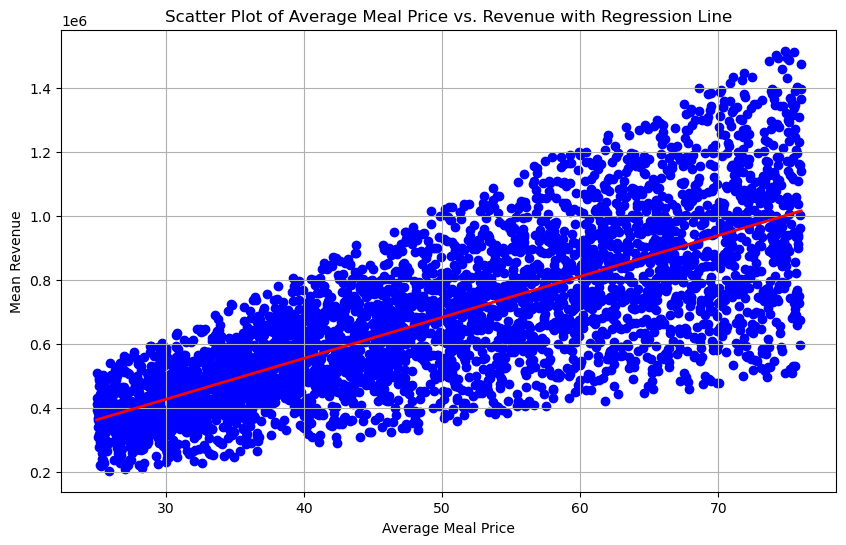

In [11]:
from sklearn.linear_model import LinearRegression

X_reshaped = X.values.reshape(-1, 1)
Y_reshaped = Y.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X_reshaped, Y_reshaped)

slope = model.coef_[0][0]
intercept = model.intercept_[0]

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"Equation of the estimated regression line: {slope}*X + {intercept}")

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, model.predict(X_reshaped), color='red', linewidth=2, label='Regression Line')
plt.title('Scatter Plot of Average Meal Price vs. Revenue with Regression Line')
plt.xlabel('Average Meal Price')
plt.ylabel('Mean Revenue')
plt.grid(True)
plt.show()

In [12]:
new_avg_meal_price = 80

predicted_revenue = slope * new_avg_meal_price + intercept
print(f"Predicted Mean Revenue: {predicted_revenue}")

Predicted Mean Revenue: 1066739.8306410538
